In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import sklearn as skl
from sklearn.linear_model import LinearRegression
import matplotlib as mplot
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
#defining standard graph size
plt.rcParams["figure.figsize"]=(8,10)

# Preparing the Data

#### Visualizing the Data

In [4]:
data = pd.read_csv('survey.csv')
#data.info();

data.describe().style.background_gradient()

,Age
count,1259
mean,7.94281e+07
std,2.8183e+09
min,-1726
25%,27
50%,31
75%,36
max,1e+11


In [5]:
#Checking for the null values
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
#Drop the unnecessary columns and view sample data
data = data.drop(['Timestamp','comments','state'], axis=1)
print("Shape of the data is: ",data.shape)
data.head()

Shape of the data is:  (1259, 24)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
# #Counting values in the each column for each occuerance
# for col in data.columns:
#     print(data[col].value_counts(dropna = False))
#     print("\n")

In [8]:
#Checking different type of entries in different columns which need to be cleaned

print(data['Gender'].unique())
#Defining the list of males and females
female_list = ['Female', 'female', 'F', 'Cis Female', 'Woman', 'f', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'femail', 'Female (cis)']
male_list = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']

#defining unique values to gnder
data['Sex_type'] = np.where(data['Gender'].isin(female_list), 'Female', 'NaN')
data['Sex_type'] = np.where(data['Gender'].isin(male_list), 'Male', data['Sex_type'])



print("\n Unique Gender Counts:\n",data['Sex_type'].value_counts(),
      "\n-----------------------------------------",
     "\n Mental Health Behaviour:\n",data['mental_health_consequence'].value_counts())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

 Unique Gender Counts:
 Male      991
Female    247
NaN        21
Name: Sex_type, dtype: int64 
----------------------------------------- 
 Mental Health Behaviour:
 No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64


In [9]:
cols=list(data.columns.values)
cols.remove("Gender")

In [10]:
data[cols].describe(include=['O']).transpose()

,count,unique,top,freq
Country,1259,48,United States,751
self_employed,1241,2,No,1095
family_history,1259,2,No,767
treatment,1259,2,Yes,637
work_interfere,995,4,Sometimes,465
no_employees,1259,6,6-25,290
remote_work,1259,2,No,883
tech_company,1259,2,Yes,1031
benefits,1259,3,Yes,477
care_options,1259,3,No,501


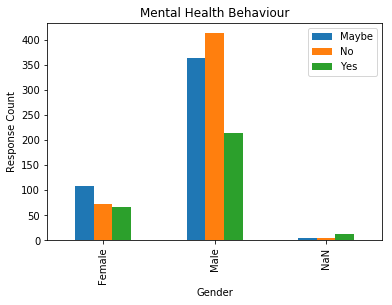

In [11]:
%matplotlib inline
pd.crosstab(data.Sex_type,data.mental_health_consequence).plot(kind='bar');
plt.title('Mental Health Behaviour');
plt.xlabel('Gender');
plt.ylabel('Response Count');
plt.legend(loc="best");

##### Data Cleaning

In [12]:
data['self_employed'] = data['self_employed'].fillna('NA');
data[data.self_employed=='NA']

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex_type
0,37,Female,United States,NA,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,M,United States,NA,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Male,Canada,NA,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Male,United Kingdom,NA,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Male,United States,NA,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
5,33,Male,United States,NA,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,Male
6,35,Female,United States,NA,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,Female
7,39,M,Canada,NA,No,No,Never,1-5,Yes,Yes,...,Don't know,No,No,No,No,No,No,No,No,Male
8,42,Female,United States,NA,Yes,Yes,Sometimes,100-500,No,Yes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,Female
9,23,Male,Canada,NA,No,No,Never,26-100,No,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Male


In [13]:
data['work_interfere'] = data['work_interfere'].fillna('NA')

data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Sex_type                     0
dtype: int64

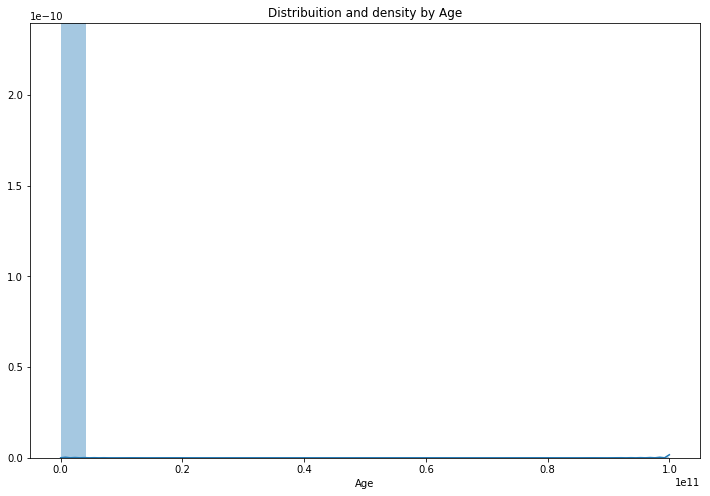

In [14]:
plt.figure(figsize=(12,8));
sns.distplot(data["Age"], bins=24);
plt.title("Distribuition and density by Age");
plt.xlabel("Age");

In [15]:
#complete missing age with mean
# data['Age'].fillna(data['Age'].median(), inplace = True)

# # Fill with media() values < 0 and > 100
# s = pd.Series(data['Age'])
# s[s<0] = data['Age'].median()
# data['Age'] = s
# s = pd.Series(data['Age'])
# s[s>100] = data['Age'].median()
# data['Age'] = s

#Filtering outliers on extreme end
data = data[data.Age < 100]
data = data[data.Age > 18]

print(data.shape)

(1244, 25)


In [16]:
data= data[~(data.Sex_type == 'NaN')]
data['Sex_type'].value_counts()

Male      981
Female    246
Name: Sex_type, dtype: int64

* Q2: Hist1 (Age Distribution)

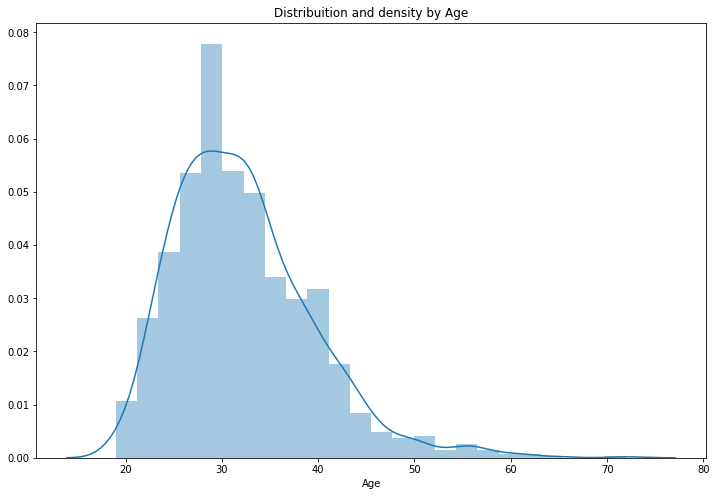

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age");

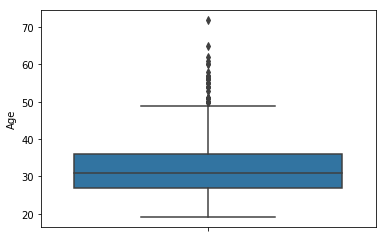

In [18]:
plt.figure(figsize=(6,4));
sns.boxplot(y = 'Age', data= data);

In [20]:
pd.crosstab(data.self_employed, data.mental_health_consequence)

mental_health_consequence,Maybe,No,Yes
self_employed,,,
NA,5,11,2
No,422,400,247
Yes,43,70,27


In [21]:
# removed 18 people with unknown self employed status - since we are trying to find association of employement on mental health
data= data[~(data.self_employed == 'NA')]

print(data.shape)

(1209, 25)


In [22]:
pd.crosstab(data.self_employed, data.mental_health_consequence)

mental_health_consequence,Maybe,No,Yes
self_employed,,,
No,422,400,247
Yes,43,70,27


In [24]:
pd.crosstab(data.family_history, data.mental_health_consequence, margins=True)

mental_health_consequence,Maybe,No,Yes,All
family_history,,,,
No,278,309,150,737
Yes,187,161,124,472
All,465,470,274,1209


In [25]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='family_history', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'family_history', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [26]:
pd.crosstab(data.work_interfere, data.mental_health_consequence, margins=True)

mental_health_consequence,Maybe,No,Yes,All
work_interfere,,,,
NA,96,133,31,260
Never,78,89,37,204
Often,51,40,44,135
Rarely,62,68,36,166
Sometimes,178,140,126,444
All,465,470,274,1209


In [27]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='work_interfere', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'work_interfere', y = 'Age', data= data, hue = 'mental_health_consequence');
# plt.legend(loc="best");

In [28]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='no_employees', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'no_employees', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [29]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='tech_company', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'tech_company', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [30]:
# import scipy.stats
# scipy.stats.chisquare(data['tech_company'].value_counts())

In [31]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='benefits', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'benefits', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [32]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='care_options', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'care_options', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [33]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='wellness_program', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'wellness_program', y = 'Age', data= data, hue = 'mental_health_consequence')
# plt.legend(loc="best");

In [34]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='seek_help', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'seek_help', y = 'Age', data= data, hue = 'mental_health_consequence')

In [35]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='anonymity', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'anonymity', y = 'Age', data= data, hue = 'mental_health_consequence')

In [36]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='leave', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'leave', y = 'Age', data= data, hue = 'mental_health_consequence')

In [37]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='treatment', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'treatment', y = 'Age', data= data, hue = 'mental_health_consequence')

In [38]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='phys_health_consequence', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'phys_health_consequence', y = 'Age', data= data, hue = 'mental_health_consequence')

In [39]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='coworkers', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'coworkers', y = 'Age', data= data, hue = 'mental_health_consequence')

In [40]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='supervisor', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'supervisor', y = 'Age', data= data, hue = 'mental_health_consequence')

In [41]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='mental_health_interview', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'mental_health_interview', y = 'Age', data= data, hue = 'mental_health_consequence')

In [42]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='mental_vs_physical', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'mental_vs_physical', y = 'Age', data= data, hue = 'mental_health_consequence')

In [43]:
# plt.figure(figsize=(10,8))
# plt.subplot(2, 1, 1)
# sns.countplot(x='obs_consequence', data=data, hue = 'mental_health_consequence')

# plt.subplot(2, 1, 2)
# sns.boxplot(x = 'obs_consequence', y = 'Age', data= data, hue = 'mental_health_consequence')

* Q1: Statistical Summary

In [44]:
data.describe()

,Age
count,1209.000000
mean,32.179487
std,7.249575
min,19.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [45]:
#standardising scaler of age
scale=StandardScaler()
data['Age_std']=scale.fit_transform(data[['Age']])

In [46]:
data['Age_Group'] = pd.cut(data.Age, [19,27,31,36,72], labels=[0,1,2,3], include_lowest=True)
data['Age_Group'].value_counts()

0    347
2    302
3    288
1    272
Name: Age_Group, dtype: int64

* __Changing Age to Categorical Data__

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 18 to 1258
Data columns (total 27 columns):
Age                          1209 non-null int64
Gender                       1209 non-null object
Country                      1209 non-null object
self_employed                1209 non-null object
family_history               1209 non-null object
treatment                    1209 non-null object
work_interfere               1209 non-null object
no_employees                 1209 non-null object
remote_work                  1209 non-null object
tech_company                 1209 non-null object
benefits                     1209 non-null object
care_options                 1209 non-null object
wellness_program             1209 non-null object
seek_help                    1209 non-null object
anonymity                    1209 non-null object
leave                        1209 non-null object
mental_health_consequence    1209 non-null object
phys_health_consequence      1209 non-null 

In [48]:
cols=list(data.columns.values)
cols.remove("Age")
cols.remove("Gender")
cols.remove("Age_std")

In [49]:
data[cols].describe(include=["O"]).transpose()

,count,unique,top,freq
Country,1209,46,United States,724
self_employed,1209,2,No,1069
family_history,1209,2,No,737
treatment,1209,2,Yes,606
work_interfere,1209,5,Sometimes,444
no_employees,1209,6,6-25,279
remote_work,1209,2,No,851
tech_company,1209,2,Yes,991
benefits,1209,3,Yes,458
care_options,1209,3,No,486


C:\Users\aasha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


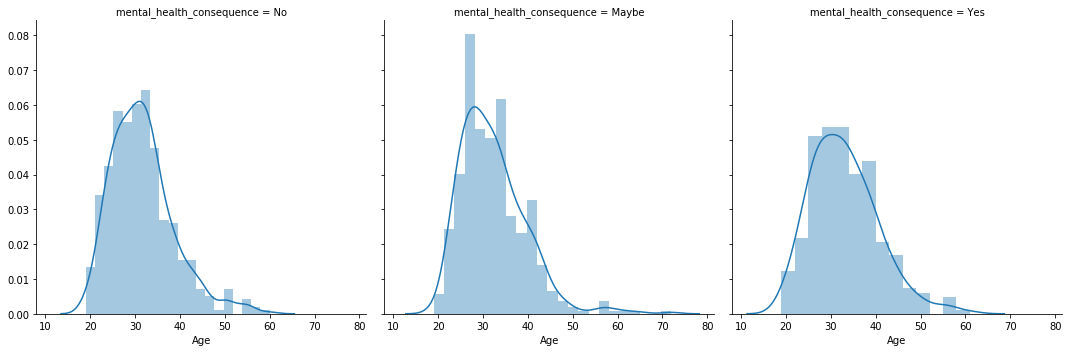

In [50]:
g = sns.FacetGrid(data, col='mental_health_consequence', size=5)
g = g.map(sns.distplot, "Age")

C:\Users\aasha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


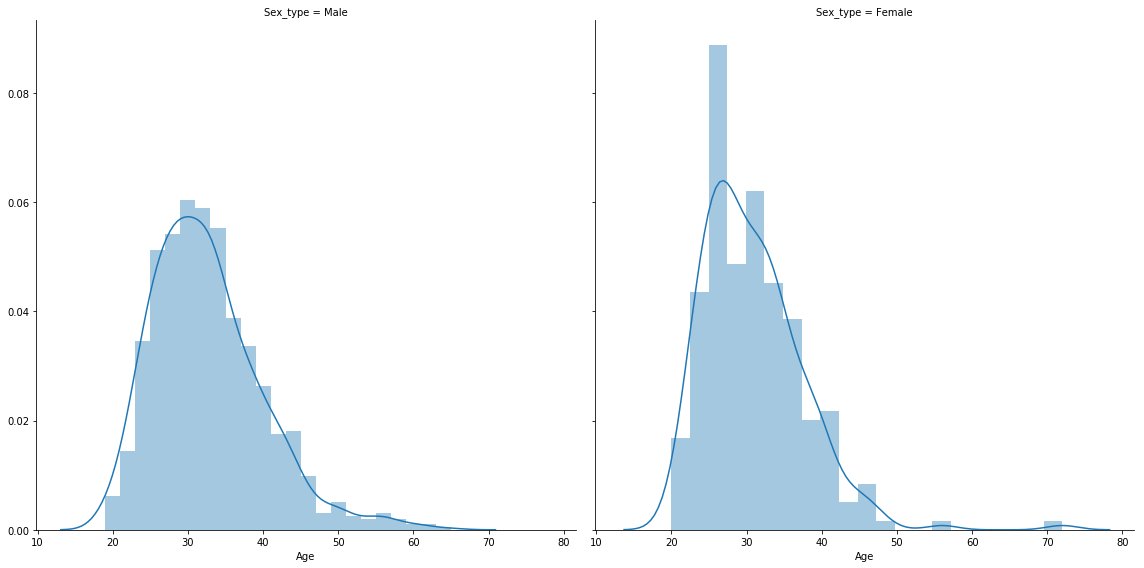

In [51]:
g = sns.FacetGrid(data, col='Sex_type', size=8)
g = g.map(sns.distplot, "Age")

In [52]:
# from sklearn.preprocessing import LabelEncoder  
# data_1 = data
# le = LabelEncoder()
# for x in data_1.columns:
#     data_1[x] = le.fit_transform(data_1[x])

In [53]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex_type,Age_std,Age_Group
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,Male,1.907178,3
19,36,Male,France,Yes,Yes,No,NA,6-25,Yes,Yes,...,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,Male,0.527216,2
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Some of them,Some of them,No,No,No,No,Male,-0.438757,1
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,No,Some of them,Some of them,No,Maybe,Yes,No,Male,-0.162765,1
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,No,Some of them,Yes,No,Maybe,No,No,Male,1.907178,3


In [54]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Sex_type', 'Age_std',
       'Age_Group'],
      dtype='object')

In [55]:
data = data[data['mental_health_consequence'] != 'Maybe']

In [56]:
data_new = data[['mental_health_consequence','treatment', 'self_employed', 'family_history', 'work_interfere' , 'no_employees', 'tech_company', 'Sex_type', 'Age_Group', 'care_options', 'leave', 'benefits', 'wellness_program', 'obs_consequence', 'supervisor', 'coworkers']]

In [57]:
data_new = data_new.reset_index(drop=True)
data_new.head()

,mental_health_consequence,treatment,self_employed,family_history,work_interfere,no_employees,tech_company,Sex_type,Age_Group,care_options,leave,benefits,wellness_program,obs_consequence,supervisor,coworkers
0,No,No,Yes,Yes,Sometimes,1-5,Yes,Male,3,Not sure,Very easy,Yes,Yes,Yes,Yes,Yes
1,No,No,Yes,Yes,NA,6-25,Yes,Male,2,No,Somewhat easy,No,Yes,No,Some of them,Some of them
2,No,No,Yes,No,Never,1-5,Yes,Male,1,No,Somewhat difficult,No,No,No,Some of them,Some of them
3,No,Yes,No,Yes,Rarely,26-100,Yes,Male,2,Not sure,Don't know,Yes,Don't know,No,Yes,Yes
4,Yes,Yes,No,Yes,Sometimes,More than 1000,No,Male,2,Yes,Very easy,Yes,No,No,Yes,Some of them


In [58]:
df = pd.DataFrame()

#### Data Encoding-Traditional

In [59]:
df['mental_health_consequence'] = np.where(data_new['mental_health_consequence'] == 'Yes', 1, 0 )
df['mental_health_consequence'] = np.where(data_new['mental_health_consequence'] == 'Maybe', 2, df['mental_health_consequence'] )

In [60]:
df['Treatment'] = np.where(data_new['treatment'] == 'Yes', 1, 0 )

In [61]:
df['Gender'] = np.where(data_new['Sex_type'] == 'Male', 0, 1)

In [62]:
df['Age_Group'] = data_new['Age_Group']

In [63]:
df['Self_Employed'] = np.where(data_new['self_employed'] == 'Yes', 1, 0 )

In [64]:
df['Fam_Hist'] = np.where(data_new['family_history'] == 'Yes', 1, 0 )

In [65]:
df['Work_Interfere'] = np.where(data_new['work_interfere'] == 'Never', 0, 4)
df['Work_Interfere'] = np.where(data_new['work_interfere'] == 'Rarely', 1, df['Work_Interfere'])
df['Work_Interfere'] = np.where(data_new['work_interfere'] == 'Sometimes', 2, df['Work_Interfere'])
df['Work_Interfere'] = np.where(data_new['work_interfere'] == 'Often', 3, df['Work_Interfere'])

df.head()

,mental_health_consequence,Treatment,Gender,Age_Group,Self_Employed,Fam_Hist,Work_Interfere
0,0,0,0,3,1,1,2
1,0,0,0,2,1,1,4
2,0,0,0,1,1,0,0
3,0,1,0,2,0,1,1
4,1,1,0,2,0,1,2


In [66]:
df['NCoworker'] = np.where(data_new['no_employees'] == '1-5', 0, 5)
df['NCoworker'] = np.where(data_new['no_employees'] == '6-25', 1, df['NCoworker'])
df['NCoworker'] = np.where(data_new['no_employees'] == '26-100', 2, df['NCoworker'])
df['NCoworker'] = np.where(data_new['no_employees'] == '100-500', 3, df['NCoworker'])
df['NCoworker'] = np.where(data_new['no_employees'] == '500-1000', 4, df['NCoworker'])

# df.head()

In [67]:
df['Tech_Company'] = np.where(data_new['tech_company'] == 'Yes', 1, 0 )

In [68]:
df['Care_Options'] = np.where(data_new['care_options'] == 'Yes', 1, 0)
df['Care_Options'] = np.where(data_new['care_options'] == 'Not sure', 2, df['Care_Options'] )

In [69]:
df['Leave'] = np.where(data_new['leave'] == 'Very easy', 0, 4)
df['Leave'] = np.where(data_new['leave'] == 'Somewhat easy', 1, df['Leave'])
df['Leave'] = np.where(data_new['leave'] == 'Somewhat difficult', 2, df['Leave'])
df['Leave'] = np.where(data_new['leave'] == 'Very difficult', 3, df['Leave'])


In [70]:
df['Benefits'] = np.where(data_new['benefits'] == 'Yes', 1, 2)
df['Benefits'] = np.where(data_new['benefits'] == 'No', 0, df['Benefits'])

In [71]:
df['Wellness'] = np.where(data_new['wellness_program'] == 'Yes', 1, 2)
df['Wellness'] = np.where(data_new['wellness_program'] == 'No', 0, df['Wellness'])

In [72]:
df['Coworkers'] = np.where(data_new['coworkers'] == 'Yes', 1, 2)
df['Coworkers'] = np.where(data_new['coworkers'] == 'No', 0, df['Wellness'])

In [73]:
df['Supervisor'] = np.where(data_new['supervisor'] == 'Yes', 1, 2)
df['Supervisor'] = np.where(data_new['supervisor'] == 'No', 0, df['Wellness'])

In [74]:
df['obs_cons'] = np.where(data_new['obs_consequence'] == 'Yes', 1, 0)

In [75]:
print(df.head())

print(df.shape)

   mental_health_consequence  Treatment  Gender Age_Group  Self_Employed  \
0                          0          0       0         3              1   
1                          0          0       0         2              1   
2                          0          0       0         1              1   
3                          0          1       0         2              0   
4                          1          1       0         2              0   

   Fam_Hist  Work_Interfere  NCoworker  Tech_Company  Care_Options  Leave  \
0         1               2          0             1             2      0   
1         1               4          1             1             0      1   
2         0               0          0             1             0      2   
3         1               1          2             1             2      4   
4         1               2          5             0             1      0   

   Benefits  Wellness  Coworkers  Supervisor  obs_cons  
0         1         1  

In [76]:
corr_matrix=df.corr(method='spearman')
corr_matrix.style.background_gradient()

,mental_health_consequence,Treatment,Gender,Self_Employed,Fam_Hist,Work_Interfere,NCoworker,Tech_Company,Care_Options,Leave,Benefits,Wellness,Coworkers,Supervisor,obs_cons
mental_health_consequence,1,0.146699,0.107528,-0.0721909,0.109143,-0.0437127,0.120351,-0.130565,-0.0894205,0.269492,-0.112407,-0.200782,-0.275498,-0.355455,0.278657
Treatment,0.146699,1,0.192334,0.0133634,0.392433,-0.0876772,0.00455864,-0.0582422,0.0793076,-0.0541588,-0.0989225,-0.0211802,-0.0273441,-0.0190096,0.13974
Gender,0.107528,0.192334,1,-0.0695192,0.206761,0.0266646,0.0693666,-0.0782439,0.0578763,0.0362392,0.0207985,0.041361,0.0430554,0.0371445,0.101269
Self_Employed,-0.0721909,0.0133634,-0.0695192,1,0.0151311,0.00674812,-0.450797,0.070945,-0.00510107,-0.123969,-0.244306,-0.0484431,-0.0257624,-0.0343543,0.0897396
Fam_Hist,0.109143,0.392433,0.206761,0.0151311,1,-0.00817624,0.0136806,-0.055932,-0.00677773,-0.0541997,-0.0151834,-0.0271292,-0.0154315,-0.0401545,0.161913
Work_Interfere,-0.0437127,-0.0876772,0.0266646,0.00674812,-0.00817624,1,-0.0241494,0.0142166,-0.0609948,-0.000887966,-0.00830396,-0.0421793,-0.0433825,-0.0592065,0.0116142
NCoworker,0.120351,0.00455864,0.0693666,-0.450797,0.0136806,-0.0241494,1,-0.233084,0.130936,0.174238,0.236295,0.281298,0.202353,0.192773,-0.00156045
Tech_Company,-0.130565,-0.0582422,-0.0782439,0.070945,-0.055932,0.0142166,-0.233084,1,-0.0322629,-0.0578938,-0.00381352,-0.0392098,-0.0281321,-0.0267677,-0.0700105
Care_Options,-0.0894205,0.0793076,0.0578763,-0.00510107,-0.00677773,-0.0609948,0.130936,-0.0322629,1,-0.0397693,0.211238,0.279635,0.254563,0.256065,-0.0261442
Leave,0.269492,-0.0541588,0.0362392,-0.123969,-0.0541997,-0.000887966,0.174238,-0.0578938,-0.0397693,1,0.132308,-0.0244853,-0.0726466,-0.100951,0.0320401


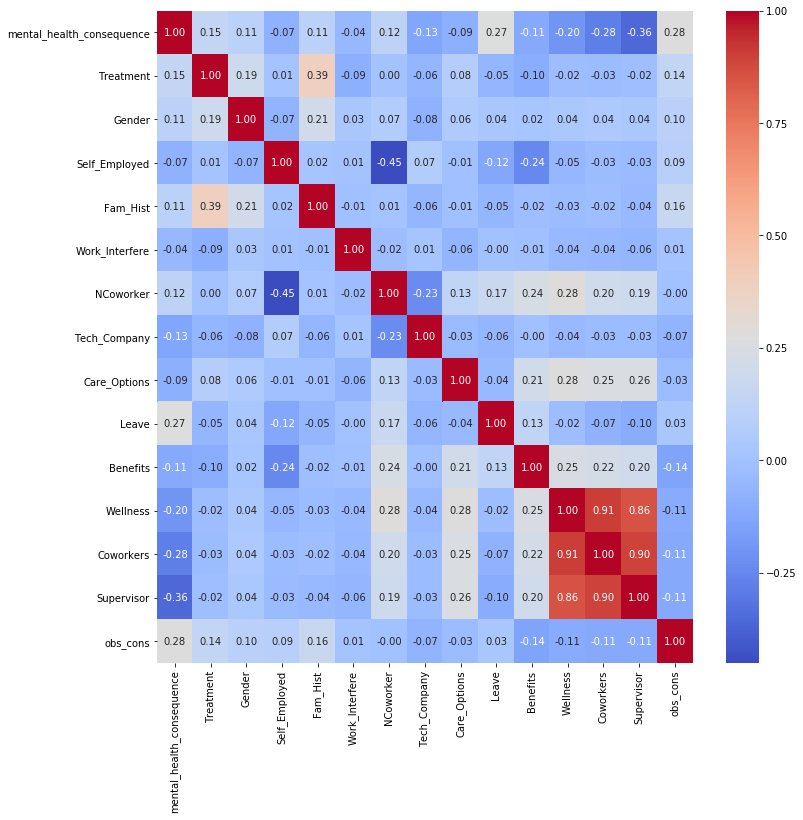

In [77]:
fig=plt.figure(figsize=(12,12))
ax=sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

* __Seprating Outcomes and Predictors into different dataframes__

In [78]:
Outcome = df['mental_health_consequence']
Predictor = df.iloc[:,1:]
Predictor.head()

,Treatment,Gender,Age_Group,Self_Employed,Fam_Hist,Work_Interfere,NCoworker,Tech_Company,Care_Options,Leave,Benefits,Wellness,Coworkers,Supervisor,obs_cons
0,0,0,3,1,1,2,0,1,2,0,1,1,1,1,1
1,0,0,2,1,1,4,1,1,0,1,0,1,1,1,0
2,0,0,1,1,0,0,0,1,0,2,0,0,0,0,0
3,1,0,2,0,1,1,2,1,2,4,1,2,2,2,0
4,1,0,2,0,1,2,5,0,1,0,1,0,0,0,0


In [79]:
Outcome.head()

0    0
1    0
2    0
3    0
4    1
Name: mental_health_consequence, dtype: int32

* _Preparing Dummies for the predictors_

In [80]:
##################                PREPARE DATA              ##################

list(Predictor)

Categorical_Columns = list(Predictor)
Categorical_Predictors_Binary = pd.get_dummies( Predictor , columns = Categorical_Columns )
#Categorical_Predictors_Binary.info()
list(Categorical_Predictors_Binary);

In [81]:
df1 = Categorical_Predictors_Binary.loc[:, ~Categorical_Predictors_Binary.columns.str.endswith('_0')]
list(df1.columns)

['Treatment_1',
 'Gender_1',
 'Age_Group_1',
 'Age_Group_2',
 'Age_Group_3',
 'Self_Employed_1',
 'Fam_Hist_1',
 'Work_Interfere_1',
 'Work_Interfere_2',
 'Work_Interfere_3',
 'Work_Interfere_4',
 'NCoworker_1',
 'NCoworker_2',
 'NCoworker_3',
 'NCoworker_4',
 'NCoworker_5',
 'Tech_Company_1',
 'Care_Options_1',
 'Care_Options_2',
 'Leave_1',
 'Leave_2',
 'Leave_3',
 'Leave_4',
 'Benefits_1',
 'Benefits_2',
 'Wellness_1',
 'Wellness_2',
 'Coworkers_1',
 'Coworkers_2',
 'Supervisor_1',
 'Supervisor_2',
 'obs_cons_1']

In [113]:
Categorical_Predictors_Binary.head()

,Treatment_0,Treatment_1,Gender_0,Gender_1,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Self_Employed_0,Self_Employed_1,...,Wellness_1,Wellness_2,Coworkers_0,Coworkers_1,Coworkers_2,Supervisor_0,Supervisor_1,Supervisor_2,obs_cons_0,obs_cons_1
0,1,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
2,1,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,0,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
4,0,1,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [83]:
##############################################################################
##################       IMPORT LIBRARIES AND PACKAGES      ##################

%pylab inline
import time, glob, pickle
import seaborn as sns
import pandas as pd
import sklearn as skl
import scipy.optimize as so
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.metrics import make_scorer, brier_score_loss, roc_auc_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\aasha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\aasha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Training and Test Spliting

In [84]:
X = df1
Y = Outcome

In [85]:
##############################################################################
#################          TRAINING & TEST DATASETS          #################

# Create stratified training and test splits

N_Folds       = 10 
RN_Seed  = 1234
cv = StratifiedKFold(n_splits= N_Folds )
Xo_train, Xo_test, y_train, y_test = train_test_split( X , Y , test_size=0.2, random_state= RN_Seed  , stratify=Y )

print("Predictors Test and Train size: ",Xo_test.shape,Xo_train.shape,
     "\nOutcomes Test and Train size: ",y_test.shape,y_train.shape)

Predictors Test and Train size:  (149, 32) (595, 32) 
Outcomes Test and Train size:  (149,) (595,)


### Support Vector Classifier

In [86]:
######################3 SVM Model #########################

from sklearn.svm import SVC 

svm_Linear = SVC(kernel = 'rbf', C = 0.9, probability=True);
#svm_Linear_cv = crossval(svm_Linear)
svm_Linear.fit(Xo_train, y_train);

######################  Using the model to predict Testing set  ########################

y_predict_svc = svm_Linear.predict(Xo_test)

y_predict_prob_yes_svc = svm_Linear.predict_proba(Xo_test)[:,1]
y_predict_prob_No_svc = svm_Linear.predict_proba(Xo_test)[:,0]
y_predict_prob_svc = svm_Linear.predict_proba(Xo_test)

print("Prediction of Test Variable:",y_predict_svc)

y_predict_prob_df_svc = pd.DataFrame(y_predict_prob_svc)

#Checking probability of each outcome classification
y_predict_prob_df_svc.head()

Prediction of Test Variable: [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0]


,0,1
0,0.452897,0.547103
1,0.327141,0.672859
2,0.775802,0.224198
3,0.354741,0.645259
4,0.410572,0.589428


In [87]:
#Priniting maximum/min probabilities of each outcome

y_predict_prob_df_svc.columns = ['No', 'Yes']
print(y_predict_prob_df_svc['No'].max())
print(y_predict_prob_df_svc['Yes'].max())
print(min(y_predict_prob_df_svc['No']))
print(min(y_predict_prob_df_svc['Yes']))
y_predict_prob_df_svc.head()

0.9780956349067966
0.9804410615517406
0.019558938448259417
0.021904365093203464


,No,Yes
0,0.452897,0.547103
1,0.327141,0.672859
2,0.775802,0.224198
3,0.354741,0.645259
4,0.410572,0.589428


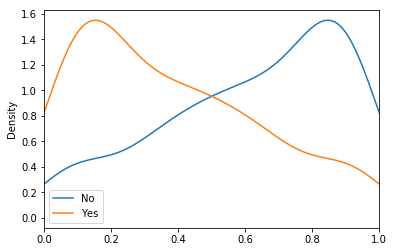

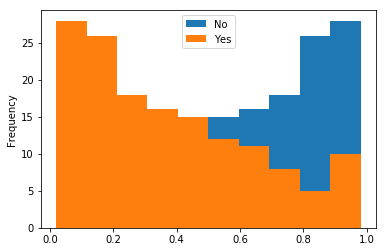

In [88]:
y_predict_prob_df_svc.plot(kind='density');
xlim(0,1);
y_predict_prob_df_svc.plot(kind='hist');

In [89]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict_svc, normalize=True ))
print(metrics.precision_score(y_test, y_predict_svc, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_svc, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_svc, target_names= ['No', 'Yes']))
metrics.confusion_matrix(y_test, y_predict_svc)

0.7449664429530202
0.7449664429530202
0.7449664429530202
             precision    recall  f1-score   support

         No       0.74      0.91      0.82        94
        Yes       0.76      0.45      0.57        55

avg / total       0.75      0.74      0.73       149



array([[86,  8],
       [30, 25]], dtype=int64)

In [90]:
svc_accuracy=metrics.zero_one_loss(y_test, y_predict_svc,normalize=False)
svc_accuracy

38

In [91]:
df_cfm_svc=pd.DataFrame(data=y_predict_svc,columns=["Prediction"])
df_cfm_svc["Actual"]=pd.DataFrame(data=y_test.values)
df_cfm_svc['Actual'] = np.where(df_cfm_svc['Actual'] == 1, 'Yes', np.where(df_cfm_svc['Actual'] == 2, 'Maybe', 'No'))
df_cfm_svc['Prediction'] = np.where(df_cfm_svc['Prediction'] == 1, 'Yes', np.where(df_cfm_svc['Prediction'] == 2, 'Maybe', 'No'))

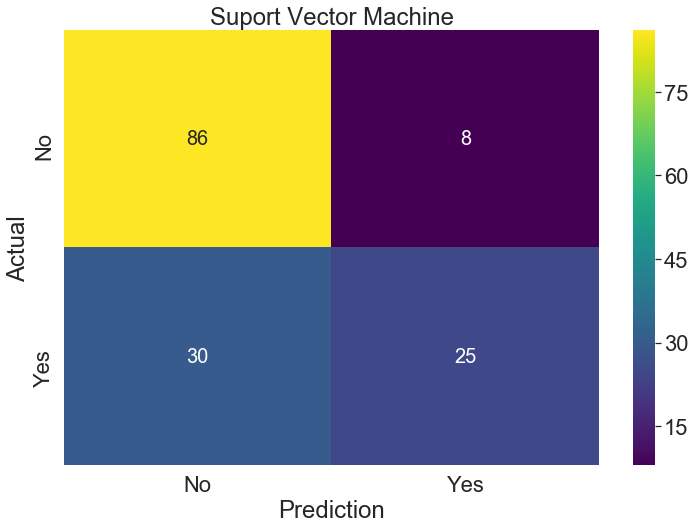

In [92]:
confusion_matrix_svc=pd.crosstab(df_cfm_svc["Actual"],df_cfm_svc["Prediction"])
plt.figure(figsize=(12,8));
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_svc,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax)
ax.set_title('Suport Vector Machine')
plt.savefig('d_ex.png')

### KNN

In [93]:
# training a KNN classifier 

from sklearn.neighbors import KNeighborsClassifier 

################# Iterated values [3,10,20,30]  ###########################
knn = KNeighborsClassifier(n_neighbors = 56,leaf_size=5)
knn.fit(Xo_train, y_train)

######################  Using the model to predict Testing set  ########################

y_predict_knn = knn.predict(Xo_test)

y_predict_prob_yes_knn = knn.predict_proba(Xo_test)[:,1]
y_predict_prob_No_knn = knn.predict_proba(Xo_test)[:,0]
y_predict_prob_knn = knn.predict_proba(Xo_test)

print("Prediction of Test Variable:",y_predict_knn)
y_predict_prob_df_knn = pd.DataFrame(y_predict_prob_knn)

y_predict_prob_df_knn.head()

Prediction of Test Variable: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0]


,0,1
0,0.571429,0.428571
1,0.482143,0.517857
2,0.589286,0.410714
3,0.553571,0.446429
4,0.589286,0.410714


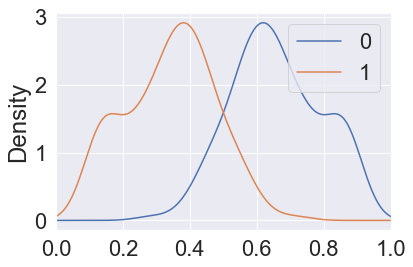

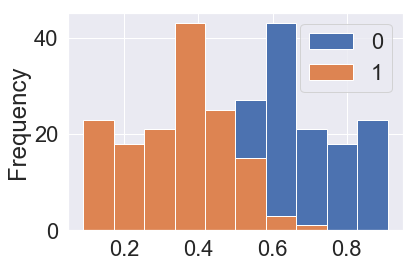

In [94]:
y_predict_prob_df_knn.plot(kind='density');
xlim(0,1);
y_predict_prob_df_knn.plot(kind='hist');

In [95]:
print(metrics.accuracy_score(y_test, y_predict_knn, normalize=True ))
print(metrics.precision_score(y_test, y_predict_knn, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_knn, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_knn, target_names= ['No', 'Yes']))
metrics.confusion_matrix(y_test, y_predict_knn)

0.7046979865771812
0.7046979865771812
0.7046979865771812
             precision    recall  f1-score   support

         No       0.69      0.97      0.81        94
        Yes       0.82      0.25      0.39        55

avg / total       0.74      0.70      0.65       149



array([[91,  3],
       [41, 14]], dtype=int64)

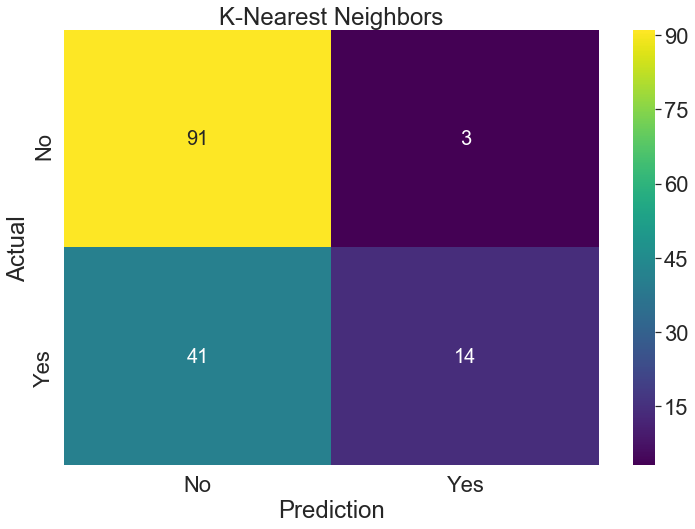

In [96]:
df_cfm_knn=pd.DataFrame(data=y_predict_knn,columns=["Prediction"])
df_cfm_knn["Actual"]=pd.DataFrame(data=y_test.values)
df_cfm_knn['Actual'] = np.where(df_cfm_knn['Actual'] == 1, 'Yes', np.where(df_cfm_knn['Actual'] == 2, 'Maybe', 'No'))
df_cfm_knn['Prediction'] = np.where(df_cfm_knn['Prediction'] == 1, 'Yes', np.where(df_cfm_knn['Prediction'] == 2, 'Maybe', 'No'))

confusion_matrix_knn=pd.crosstab(df_cfm_knn["Actual"],df_cfm_knn["Prediction"])
plt.figure(figsize=(12,8));
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_knn,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax)
ax.set_title('K-Nearest Neighbors')
plt.savefig('c_ex.png')

### Decision Tree

In [97]:
# training a DescisionTreeClassifier 

from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(max_depth=4, random_state= RN_Seed,min_samples_leaf=2);
dt.fit(Xo_train, y_train);

######################  Using the model to predict Testing set  ########################

y_predict_dt = dt.predict(Xo_test)

y_predict_prob_yes_dt = dt.predict_proba(Xo_test)[:,1]
y_predict_prob_No_dt = dt.predict_proba(Xo_test)[:,0]
y_predict_prob_dt = dt.predict_proba(Xo_test)

print("Prediction of Test Variable:",y_predict_dt)

y_predict_prob_df_dt = pd.DataFrame(y_predict_prob_dt)

y_predict_prob_df_dt.head()

Prediction of Test Variable: [1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 1]


,0,1
0,0.461538,0.538462
1,0.461538,0.538462
2,0.884615,0.115385
3,0.517857,0.482143
4,0.517857,0.482143


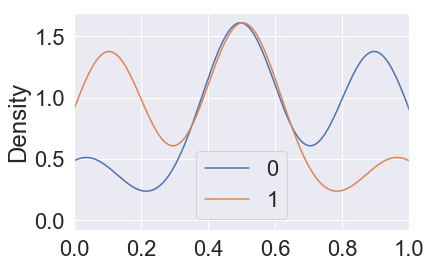

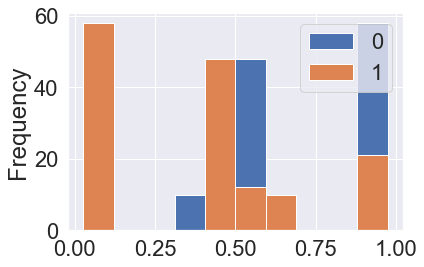

In [98]:
y_predict_prob_df_dt.plot(kind='density');
xlim(0,1);
y_predict_prob_df_dt.plot(kind='hist');

In [99]:
print(metrics.accuracy_score(y_test, y_predict_dt, normalize=True ))
print(metrics.precision_score(y_test, y_predict_dt, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_dt, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_dt, target_names= ['No', 'Yes']))
metrics.confusion_matrix(y_test, y_predict_dt)

0.6644295302013423
0.6644295302013423
0.6644295302013423
             precision    recall  f1-score   support

         No       0.71      0.80      0.75        94
        Yes       0.56      0.44      0.49        55

avg / total       0.65      0.66      0.65       149



array([[75, 19],
       [31, 24]], dtype=int64)

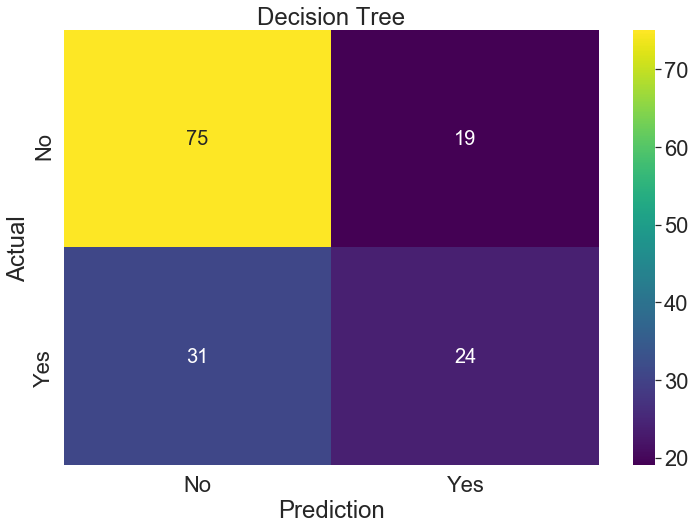

In [100]:
df_cfm_dt=pd.DataFrame(data=y_predict_dt,columns=["Prediction"])
df_cfm_dt["Actual"]=pd.DataFrame(data=y_test.values)
df_cfm_dt['Actual'] = np.where(df_cfm_dt['Actual'] == 1, 'Yes', np.where(df_cfm_dt['Actual'] == 2, 'Maybe', 'No'))
df_cfm_dt['Prediction'] = np.where(df_cfm_dt['Prediction'] == 1, 'Yes', np.where(df_cfm_dt['Prediction'] == 2, 'Maybe', 'No'))

confusion_matrix_dt=pd.crosstab(df_cfm_dt["Actual"],df_cfm_dt["Prediction"])
plt.figure(figsize=(12,8));
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_dt,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax)
ax.set_title('Decision Tree')
plt.savefig('b_ex.png')

### Random Forest

In [101]:
# training a DescisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,max_depth=9,random_state= RN_Seed,min_samples_leaf=3);
rfc.fit(Xo_train, y_train);

######################  Using the model to predict Testing set  ########################

y_predict_rfc = rfc.predict(Xo_test)

y_predict_prob_yes_rfc = rfc.predict_proba(Xo_test)[:,1]
y_predict_prob_No_rfc = rfc.predict_proba(Xo_test)[:,0]
y_predict_prob_rfc = rfc.predict_proba(Xo_test)

print("Prediction of Test Variable:",y_predict_rfc)

y_predict_prob_df_rfc = pd.DataFrame(y_predict_prob_rfc)

y_predict_prob_df_rfc.head()


Prediction of Test Variable: [1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0]


,0,1
0,0.466906,0.533094
1,0.414969,0.585031
2,0.535813,0.464187
3,0.559470,0.440530
4,0.569800,0.430200


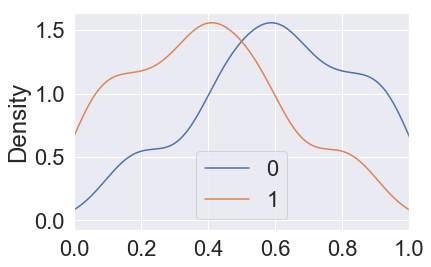

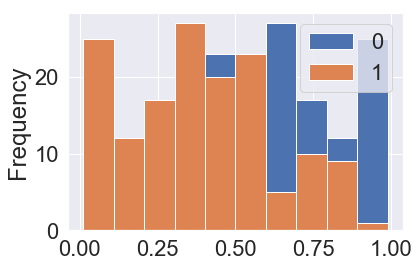

In [102]:
y_predict_prob_df_rfc.plot(kind='density');
xlim(0,1);
y_predict_prob_df_rfc.plot(kind='hist');

In [103]:
print(metrics.accuracy_score(y_test, y_predict_rfc, normalize=True ))
print(metrics.precision_score(y_test, y_predict_rfc, average= 'micro'))
print(metrics.recall_score(y_test, y_predict_rfc, average= 'micro'))
# print(metrics.roc_auc_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict_rfc, target_names= ['No', 'Yes']))
metrics.confusion_matrix(y_test, y_predict_rfc)

0.738255033557047
0.738255033557047
0.738255033557047
             precision    recall  f1-score   support

         No       0.77      0.83      0.80        94
        Yes       0.67      0.58      0.62        55

avg / total       0.73      0.74      0.73       149



array([[78, 16],
       [23, 32]], dtype=int64)

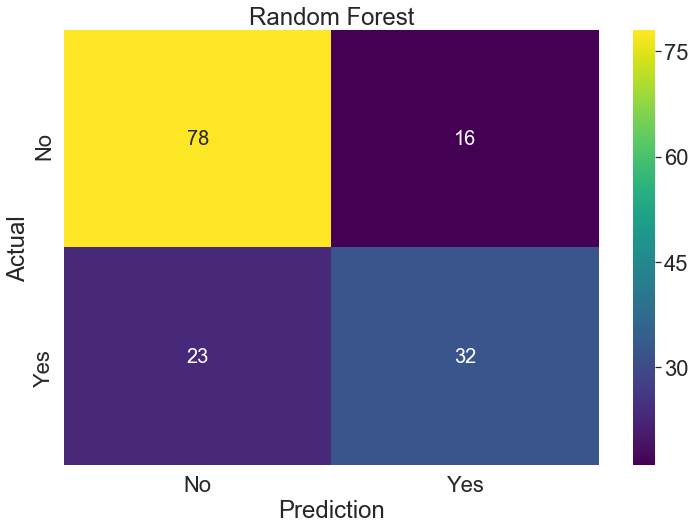

In [104]:
df_cfm_rfc=pd.DataFrame(data=y_predict_rfc,columns=["Prediction"])
df_cfm_rfc["Actual"]=pd.DataFrame(data=y_test.values)
df_cfm_rfc['Actual'] = np.where(df_cfm_rfc['Actual'] == 1, 'Yes', np.where(df_cfm_rfc['Actual'] == 2, 'Maybe', 'No'))
df_cfm_rfc['Prediction'] = np.where(df_cfm_rfc['Prediction'] == 1, 'Yes', np.where(df_cfm_rfc['Prediction'] == 2, 'Maybe', 'No'))

confusion_matrix_rfc=pd.crosstab(df_cfm_rfc["Actual"],df_cfm_rfc["Prediction"])
plt.figure(figsize=(12,8));
sns.set(font_scale=2) 
ax = plt.axes()
sns.heatmap(confusion_matrix_rfc,annot=True,cmap="viridis",annot_kws={"size": 20}, ax = ax)
ax.set_title('Random Forest')
plt.savefig('a_ex.png')

### Senstivity Analysis

In [118]:
models=["Random Forest"]
rf_accuracy=[]
split_ratio=[]

for i in range(1,99):
    ##Defining split size
    a=0.01*i
    split_ratio.append(a)
    
    #Splitting the data
    Xo_train, Xo_test, y_train, y_test = train_test_split( X , Y , test_size=a, random_state= RN_Seed  , stratify=Y )
    
    #making the RF model
    svm_Linear_sv = SVC(kernel = 'rbf', C = 0.9, probability=True);
    #svm_Linear_cv = crossval(svm_Linear)
    svm_Linear_sv.fit(Xo_train, y_train);

    
    #Predicting the test value
    y_predict_svm = svm_Linear_sv.predict(Xo_test)
    
    rf_accuracy.append(metrics.accuracy_score(y_test, y_predict_svm, normalize=True ))

In [119]:
df_results=pd.DataFrame()
df_results['Split_Ratio']=split_ratio
df_results['RF_accuracy']=rf_accuracy

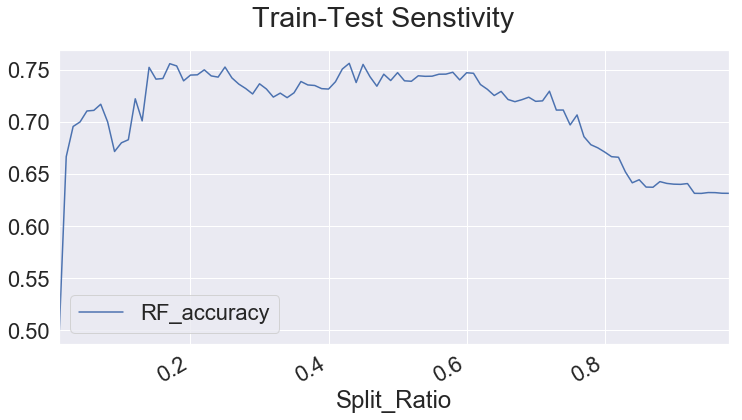

In [120]:
df_results.plot(x="Split_Ratio",y=['RF_accuracy'],figsize = (12,6),
                sharex=True,title = 'Train-Test Senstivity',subplots=True);
# # fig = plt.figure()
# # ax = fig.add_subplot(111)    # The big subplot
# # ax1 = fig.add_subplot(211)
# # ax2 = fig.add_subplot(212)

In [122]:
df_results[df_results["RF_accuracy"]==df_results.RF_accuracy.max()]

,Split_Ratio,RF_accuracy
42,0.43,0.75625


### Random Generation

In [109]:
col_list=list(Xo_test.columns.values)
val_dict={}

for c in col_list:
    val_dict[c]=list(np.random.choice(2,100))


df_random =pd.DataFrame(val_dict)
Y_rand_pred = pd.DataFrame(svm_Linear.predict(df_random),columns=["Mental_Health_Cons"])
Y_rand_pred["Mental_Health_Cons"] = np.where(Y_rand_pred["Mental_Health_Cons"] == 1, 'Yes', np.where(Y_rand_pred["Mental_Health_Cons"] == 2, 'Maybe', 'No'))
Y_rand_pred["Mental_Health_Cons"].value_counts()

No     52
Yes    48
Name: Mental_Health_Cons, dtype: int64